In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [3]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
column = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv',names=column)

In [5]:
data.shape

(5001, 14)

In [6]:
df_loan = df

In [7]:
y= df_loan['Personal Loan']
df_loan.drop(['Personal Loan'], axis = 1,inplace = True)
df['Personal Loan'] = y
df_loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1


In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df_loan.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

In [10]:
df_loan['Experience']

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We can replace missing values with mean, median, mode or any particular value. Sklearn provides Imputer() method to perform imputation in 1 line of code. We just need to define missing_values, axis, and strategy. We are using “median” value of the column to substitute with the missing value.

In [11]:
df_loan[df_loan['Experience'] == -2]['Experience'].count()

15

In [12]:
df_loan['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df_loan['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df_loan['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )
df_loan['Experience'].isnull().sum()

52

In [13]:
df_loan['Experience'].fillna(df_loan['Experience'].median(),inplace=True)
df_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [14]:
df_loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.000465,0.005526,0.013459,0.008834,-0.014013
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


In [15]:
df_loan["Personal Loan"].value_counts()# the aim here is a customer buying personal loans. hence target is personal loans

0    4520
1     480
Name: Personal Loan, dtype: int64

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

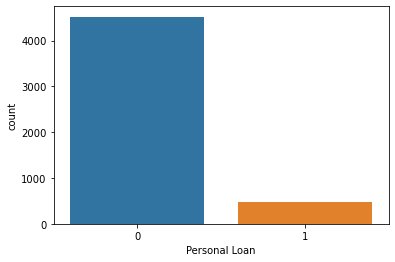

In [16]:
sns.countplot(df_loan["Personal Loan"])

In [17]:
#Findings 

#All the columns/attributes have 5000 non-null values.
#There is no null value present in the data frame.

#Total 52 negative values in Experience as Experience can't have negative values hence replacing it with a median

# ID:  This attribute can be dropped. Though the data distribution is normal.

# Age: Three small peaks can be indicating three values of age would be slightly more in number.

# Education: Mean and median are almost equal. 

# Income:  Data for the less income customers is more in the sample.

#  ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more. .

# Family: It has 4 peaks(4 values), families with the least member is the highest in the sample.

# Mortgage: most customers are having least mortgage while very few have some mortgage.

# Securities Account:  majority of the customers are not having a Security account.

# CD account: Most of the customers don’t have CD accounts.

# Online: Higher number of customers use online banking in the sample.

#Credit Card: This attribute has fewer customers using CC in comparison to the CC users.




In [18]:
count_no_buyers = len(df_loan[df_loan['Personal Loan']==0])
print('count_no_buyers :',count_no_buyers)
count_buyers = len(df_loan[df_loan['Personal Loan']==1])
print('count_buyers :',count_buyers)
pct_of_no_buyers = count_no_buyers/(count_no_buyers+count_buyers)
print('pct_of_no_buyers')
print("percentage of no buyers is", pct_of_no_buyers*100)
pct_of_buyers = count_buyers/(count_no_buyers+count_buyers)
print("percentage of buyers", pct_of_buyers*100)

count_no_buyers : 4520
count_buyers : 480
pct_of_no_buyers
percentage of no buyers is 90.4
percentage of buyers 9.6


In [36]:
a = df_loan.var()
a[a<1]

Education             0.705380
Securities Account    0.093519
CD Account            0.056763
Online                0.240678
CreditCard            0.207606
Personal Loan         0.086801
dtype: float64

In [37]:
#Personal loans is having a comparatively better relation with Income.

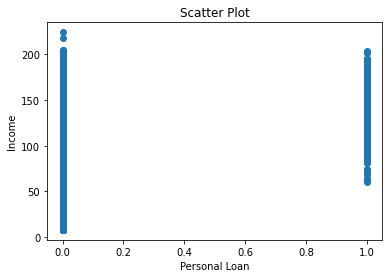

In [38]:
plt.scatter(df['Personal Loan'], df['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Personal Loan')
plt.ylabel('Income')
  
plt.show()

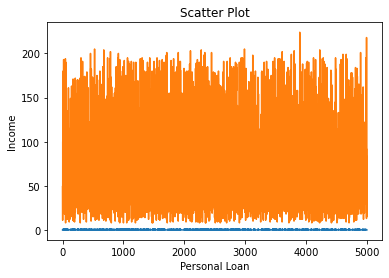

In [39]:
plt.plot(df['Personal Loan'])
plt.plot(df['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Personal Loan')
plt.ylabel('Income')
  
plt.show()

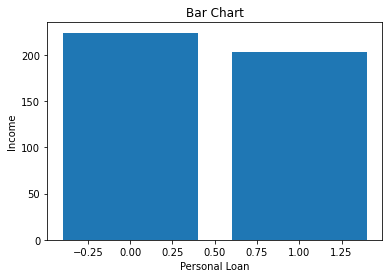

In [40]:
plt.bar(df['Personal Loan'], df['Income'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('Personal Loan')
plt.ylabel('Income')
  
# Adding the legends
plt.show()

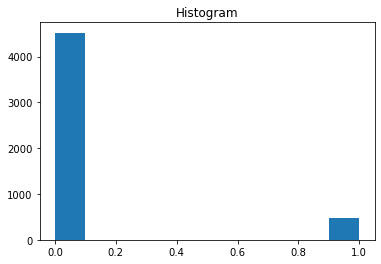

In [41]:
plt.hist(df['Personal Loan'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

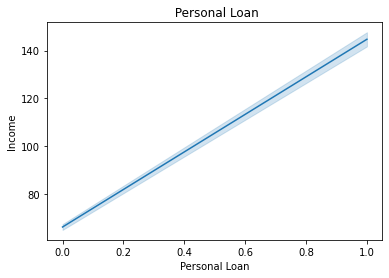

In [42]:
sns.lineplot(x="Personal Loan", y="Income", data=df)
  
# setting the title using Matplotlib
plt.title(' Personal Loan')
  
plt.show()

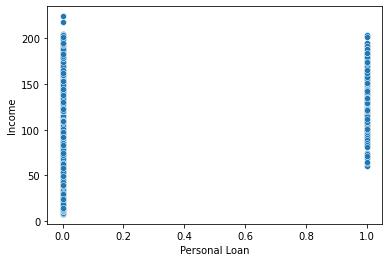

In [43]:
  
sns.scatterplot(x='Personal Loan', y='Income', data=df,)
plt.show()

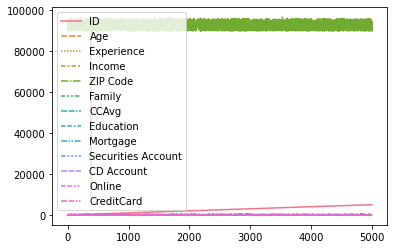

In [44]:
sns.lineplot(data=df.drop(['Personal Loan'], axis=1))
plt.show()

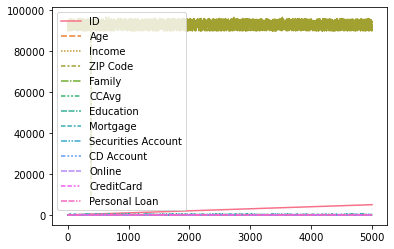

In [45]:
sns.lineplot(data=df.drop(['Experience'], axis=1))
plt.show()

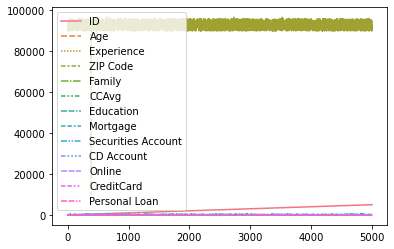

In [46]:
sns.lineplot(data=df.drop(['Income'], axis=1))
plt.show()

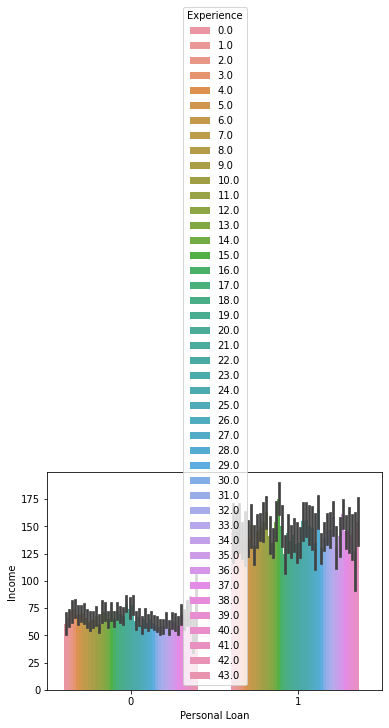

In [47]:
sns.barplot(x='Personal Loan',y='Income', data=df, 
            hue='Experience')
  
plt.show()

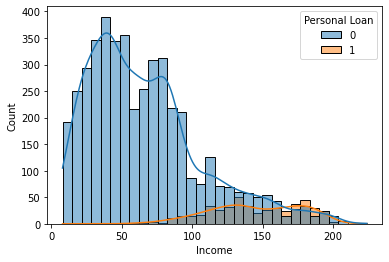

In [48]:
sns.histplot(x='Income', data=df, kde=True, hue='Personal Loan')
  
plt.show()

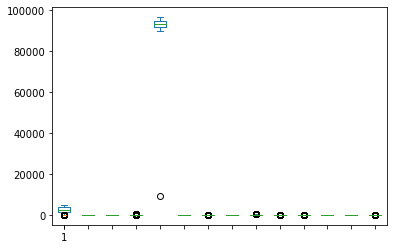

In [49]:
df.plot.box()
  
# individual attribute box plot
plt.boxplot(df['Personal Loan'])
plt.show()

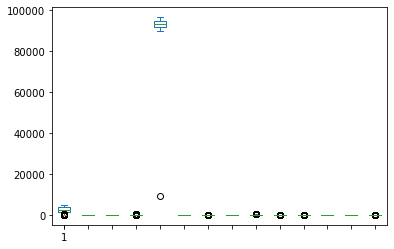

In [50]:
df.plot.box()
  
# individual attribute box plot
plt.boxplot(df['Income'])
plt.show()

<AxesSubplot:ylabel='Personal Loan'>

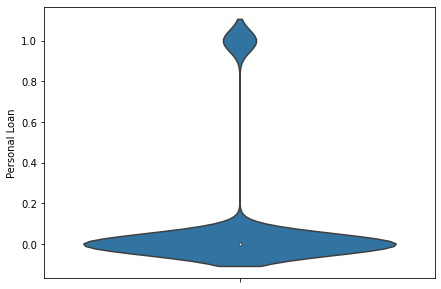

In [51]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(7, 5))
sns.violinplot( ax = ax, y = df["Personal Loan"] )

<AxesSubplot:ylabel='Experience'>

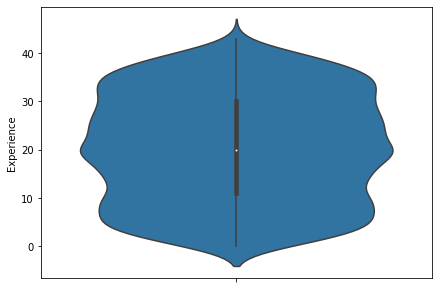

In [52]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(7, 5))
sns.violinplot( ax = ax, y = df["Experience"] )

<AxesSubplot:ylabel='Income'>

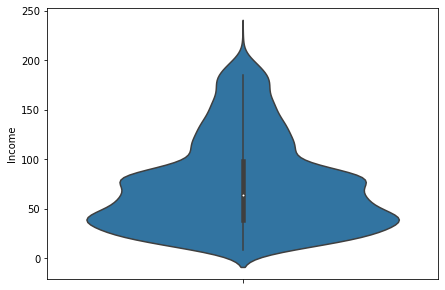

In [53]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(7, 5))
sns.violinplot( ax = ax, y = df["Income"] )

In [54]:
df_loan.drop(columns ='Experience',inplace= True)
df_loan.drop(columns ='ID',inplace=True)
df_loan.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0


In [56]:
array = df_loan
X= array.iloc[:,0:11]
y= array.iloc[:,11]

In [57]:
standardized_X = preprocessing.scale(X)
standardized_X

array([[-1.77441684, -0.53822878, -0.96411408, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -1.44393158, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301,  0.73881384, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.0610391 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -1.46985492, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.25475717, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [58]:
normalized_X = preprocessing.normalize(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)